In [1]:
!git clone https://github.com/calibretaliation/DeepLearning20211.git

Cloning into 'DeepLearning20211'...
remote: Enumerating objects: 32440, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 32440 (delta 0), reused 0 (delta 0), pack-reused 32437
Receiving objects: 100% (32440/32440), 1.68 GiB | 32.52 MiB/s, done.
Resolving deltas: 100% (45/45), done.
Checking out files: 100% (32421/32421), done.


In [94]:
import random
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.io import read_image

In [95]:
def my_seed(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [11]:
train_img_path = '/content/DeepLearning20211/data/train_images'
test_img_path = '/content/DeepLearning20211/data/test_images'

In [3]:
train_df = pd.read_csv('/content/DeepLearning20211/data/train.csv')
test_df = pd.read_csv('/content/DeepLearning20211/data/test.csv')

In [116]:
train_df.head(2)

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045


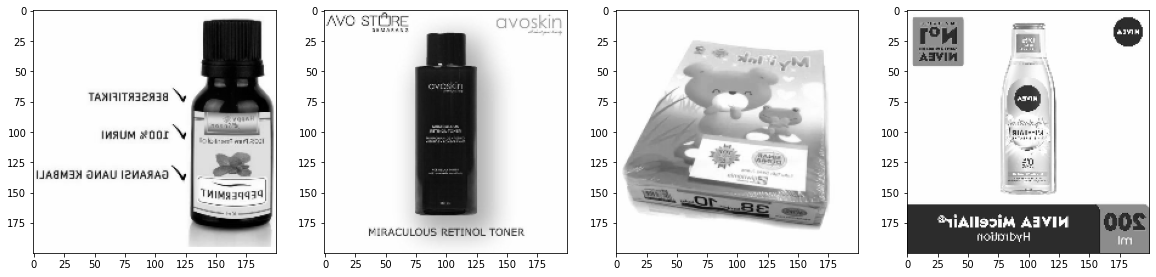

In [115]:
class ShopeeDataset(Dataset):

    def __init__(self, dataframe, dir_path, transforms):
        self.dataframe = dataframe
        self.dir_path = dir_path
        self.transforms = transforms

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        img_info = self.dataframe.iloc[index]
        img = cv2.imread(self.dir_path + '/' + img_info['image'])
        
        img = self.transforms(img)
        
        label = torch.tensor([img_info['label_group']])

        return img, label


# ----------------------- Example --------------------------
shopee_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((200, 200)),
    
    ### add other transforms here
    
])
ds = ShopeeDataset(train_df, train_img_path, shopee_transform)

my_seed(42)

dl = DataLoader(ds, batch_size=4, shuffle=True)

# visualize a batch
i = iter(dl)
plt.figure(figsize=(20, 5))
j = 1
for img in next(i)[0]:
    plt.subplot(1, 4, j)
    j += 1
    plt.imshow(img.permute(1, 2, 0))